# Final Project
---
#### Name: 劉耀文 (Yao-Wen Liu)
#### Student ID: 0716236
---

## Data Input and library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#read dataset
dataset = pd.read_csv("output.txt", sep=" ", header=None)
dataset

,0,1,2,3,4,5
0,NSS2,MCS0,GI,1.708924e-14,0.000000,720p
1,NSS2,MCS1,GI,2.365581e-05,0.000000,1080p
2,NSS2,MCS3,GI,3.174185e-05,0.000000,1080p
3,NSS2,MCS6,GI,7.080627e-05,0.000000,1080p
4,NSS2,MCS6,GI,7.710466e-05,0.000000,1080p
...,...,...,...,...,...,...
361,NSS2,MCS6,SGI,3.871030e-02,0.044337,1080p
362,NSS2,MCS8,SGI,4.179870e-02,0.033253,1080p
363,NSS2,MCS7,SGI,4.400402e-02,0.024940,1080p
364,NSS2,MCS8,SGI,4.542799e-02,0.018705,1080p


## Data Visualization

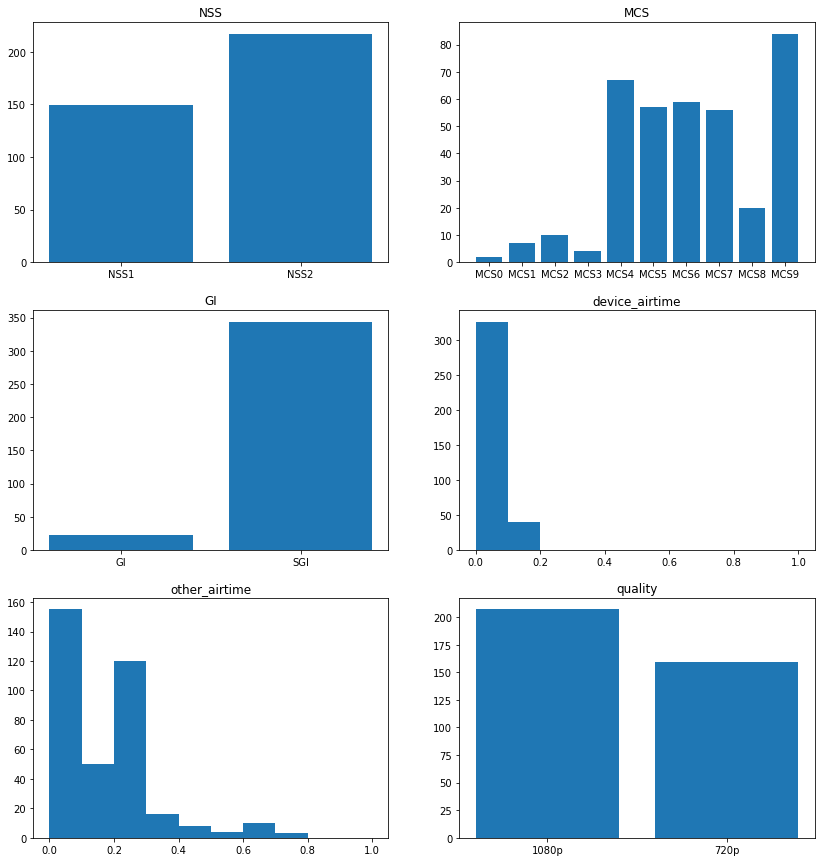

In [2]:
feature_list=['NSS', 'MCS', 'GI', 'device_airtime', 'other_airtime', 'quality']
plt.figure(figsize=(14, 15))
for i in range(0,6):
    if i == 3 or i ==4:
        plt.subplot(3,2,i+1)
        plt.hist(dataset[i], bins=10, range=[0, 1])
        plt.title(feature_list[i])
    else:
        plt.subplot(3,2,i+1)
        labels, index=np.unique(dataset[i], return_index=True)
        counts=[]
        for j in range(0,len(labels)):
            counts.append(dataset[i].tolist().count(labels[j]))
        plt.bar(labels, counts)
        plt.title(feature_list[i])

plt.savefig('vis.png')
plt.show()

## Data preprocessing

In [3]:
# Transform data format so your model can process them. (From characters to integers)
labelencoder=LabelEncoder()
for column in [0,1,2,5]:
    dataset[column] = labelencoder.fit_transform(dataset[column])

# Shuffle the data.
processed_data = dataset.sample(frac=1).reset_index(drop=True)
processed_data

,0,1,2,3,4,5
0,0,9,1,0.095113,0.009707,0
1,1,7,1,0.052887,0.235150,0
2,1,8,1,0.031721,0.007169,0
3,1,6,1,0.017022,0.262637,1
4,1,6,1,0.000386,0.000000,0
...,...,...,...,...,...,...
361,1,1,1,0.001949,0.447561,1
362,0,4,1,0.101513,0.023008,0
363,0,9,1,0.074655,0.222782,0
364,1,5,1,0.049868,0.112219,0


## Model construction and performance
#### Spliting data and declaring some variables

In [4]:
X = processed_data.drop([5], axis=1).values
Y = processed_data[5].values

# get index of each epoch
k_fold = KFold(n_splits=3)
k_fold.get_n_splits(X)

# variables to store performance
accuracy = [0] * 3
recall = [0] * 3
precision = [0] * 3
conf_matrix = [[[0]*2]*2] * 3

#### Decision Tree

In [5]:
clf = DecisionTreeClassifier(criterion="entropy")
for train_index, test_index in k_fold.split(X):
    # get data in this epoch
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    accuracy[0] += accuracy_score(y_test, y_predict)*100
    recall[0] += recall_score(y_test, y_predict)*100
    precision[0] += ps(y_test, y_predict)*100
    conf_matrix[0] += confusion_matrix(y_true=y_test, y_pred=y_predict)

#### Random Forest

In [6]:
clf = RandomForestClassifier(n_estimators=10, max_features="sqrt", criterion="entropy")
for train_index, test_index in k_fold.split(X):
    # get data in this epoch
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    accuracy[1] += accuracy_score(y_test, y_predict)*100
    recall[1] += recall_score(y_test, y_predict)*100
    precision[1] += ps(y_test, y_predict)*100
    conf_matrix[1] += confusion_matrix(y_true=y_test, y_pred=y_predict)

#### K-NN

In [7]:
clf = KNeighborsClassifier(n_neighbors=10, weights="distance")
for train_index, test_index in k_fold.split(X):
    # get data in this epoch
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    accuracy[2] += accuracy_score(y_test, y_predict)*100
    recall[2] += recall_score(y_test, y_predict)*100
    precision[2] += ps(y_test, y_predict)*100
    conf_matrix[2] += confusion_matrix(y_true=y_test, y_pred=y_predict)

#### Performance

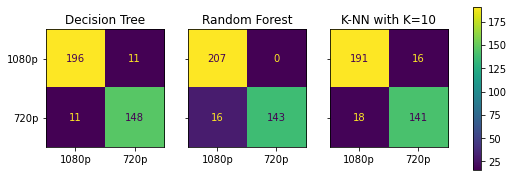

		Accuracy	Sensitivity	Precision
Decision Tree	93.99%		92.94%		93.28%
Random Forest	95.63%		90.18%		100.0%
K-NN with K=10	90.71%		88.85%		89.89%


In [8]:
labels = ['1080p', '720p']
titles = ['Decision Tree', 'Random Forest', 'K-NN with K=10']
f, axes = plt.subplots(1, 3, figsize=(9, 3), sharey='row')

for i in range(0,3):
    disp = ConfusionMatrixDisplay(conf_matrix[i], display_labels=labels)
    disp.plot(ax=axes[i])
    disp.ax_.set_title(titles[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    disp.ax_.set_ylabel('')

f.colorbar(disp.im_, ax=axes)
plt.savefig('performance.png')
plt.show()


print("\t\tAccuracy\tSensitivity\tPrecision")
for i in range(0,3):
    print(titles[i] + "\t" + str(round(accuracy[i]/3,2)) + "%\t\t" 
          + str(round(recall[i]/3,2)) + "%\t\t" + str(round(precision[i]/3,2)) + "%")